<a name="top"></a>Übersicht: Plots
===

* [Plots](#plots)
  * [Kurven](#kurven)
  * [Titel, Axen, Legenden](#stuff)
  * [Felder](#felder)
* [Anwendungsbeispiel](#anwendung)
* [Übung 08: Plots](#uebung08)
* [Referenzen](#referenzen)

**Lernziele:** Am Ende dieser Einheit
* könnt ihr simple Plots von Kurven erstellen
* wisst ihr, wie ihr Plots mit Titeln, Achsenbeschriftungen und Legenden verseht.
* könnt ihr Felder darstellen
* habt ihr ein Anwendungsbeispiel aus meinem Arbeitsbereich gesehen.

<a name="plots"></a>Plots
===

Eine Standardaufgabe im Wissenschaftsbetrieb ist das visuelle Darstellen von Daten, das Plotten.  

Es gibt viel Software und viele Bibliotheken, die diese Aufgabe mehr oder weniger zufriedenstellend erledigen können. Für Python ist die größte und bekannteste ```matplotlib```. Praktischerweise interagiert ```matplotlib``` ohne Probleme mit ```NumPy``` Arrays - wir können die Arrays einfach als Argumente in die Plot-Funktionen stecken!

<a name="kurven"></a>Kurven
---

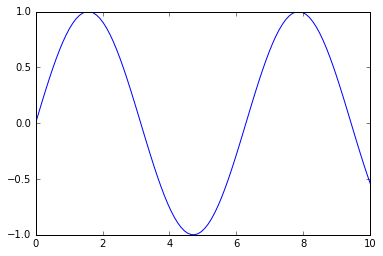

In [48]:
# das sub-modul von matplolib welches wir hier
# zum plotten verwenden nennt sich "pyplot" und 
# wir importieren es unter dem Kürzel "plt".
import matplotlib.pyplot as plt

# wir importieren auch numpy um schnell
# Beispieldaten generieren zu können.
import numpy as np

# diese Zeile macht, dass die Plots direkt
# im Jupyter-Notebook angezeigt werden
%matplotlib inline

# generiere ein numpy array mit 100 
# Datenpunkten zwischen 0 und 10 um die
# x-Werte zu erhalten
x = np.linspace(0,10,100)

# moduliere das Array mit der Sinus-Funktion
# um die y-Werte zu erhalten.
y = np.sin(x)

# die plot() Funktion nimmt zwei Listen als
# Argumente: die x-Koordinaten und die 
# y-Koordinaten, und plottet sie
plt.plot(x,y);

<a name="stuff"></a>Titel, Axen, Legenden
---

Um daraus einen guten Plot mit etwas Aussagekraft zu machen, brauchen wir noch einen Titel, Axenbeschriftungen und eine Legende:

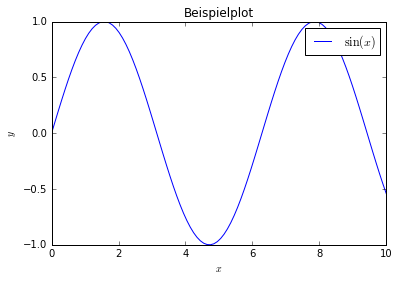

In [25]:
# setze einen String als Titel
plt.title('Beispielplot')

# setze die Achsenbeschriftungen
plt.xlabel('$x$')
plt.ylabel('$y$')

# plotte die Kurve und weise der Kurve 
# einen Namen zu
plt.plot(x,y, label='$\\sin(x)$')

# füge eine Legende hinzu die den Namen 
# der Kurve verwendet
plt.legend();

**WICHTIG:** Wir können in den Beschriftungen direkt hübsche LaTeX Zeichen verwenden, indem wir den String mit $$ Zeichen umgeben.

<a name="felder"></a>Felder
---

Eine zweite, handliche Funktion neben ```plot()``` ist ```imshow()```. Imshow kann Bilder anzeigen. 

In [13]:
# um Bilder laden zu können, brauchen wir eine
# spezielle Bibliothek, die mit Bildern umgehen
# kann: die Python Image Library (PIL)
from PIL import Image

# mit der Funktionalität "Image" aus der PIL
# können wir das Bild aus der Datei lesen
img = Image.open('polygons.jpg')

# dann konvertieren wir das Bild in ein Array
img = np.asarray(img)

# img ist ein dreidimensionales Array mit den
# Dimensionen 816 x 1232 x 3
print(img.shape)

(816, 1232, 3)


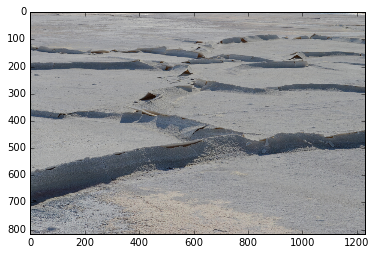

In [19]:
# und zeigen es mittels imshow() an
plt.imshow(img)

Digitale Bilder können nämlich einfach als Matrizen aufgefasst werden! Jedes Pixel hat $(x,y)$ - Koordinaten und einen Grauwert. Wenn das Digitalbild in Farbe vorliegt, gibt es drei Farbkanäle (rot, grün und blau) die zusammen die Farbe des Bildes ergeben.

Das obige Programm ist ein sehr gutes Beispiel für den Alltag beim Programmieren in Python: es gibt viele auf spezielle Anwendungen spezialisierte Anwendungen die im Zusammenspiel relativ komplexe Ergebnisse in relativ wenigen Zeilen Code realisieren.  

Fast alle wissenschaftlichen Bibliotheken akzeptieren mittlerweile ```NumPy``` Arrays als Eingabe und fast alle Datentypen lassen sich mittlerweile in Arrays konvertieren - das macht das Leben ungemein viel einfacher!

<a name="anwendung"></a>Anwendungsbeispiel
===

Das bisher gelernte können wir zusammenbauen, um ein Programm zu schreiben das schon recht nahe an ein im richtigen Leben anwendbares, sinnvolles Stück Code herankommt:

In [45]:
# importiere die notwendigen Module
import numpy as np
import matplotlib.pyplot as plt

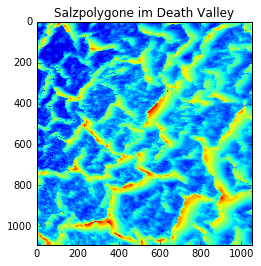

In [49]:
# lade die Daten und visualisiere sie für
# einen ersten Eindruck
data = np.loadtxt('polygons.txt')

plt.title('Salzpolygone im Death Valley')
plt.imshow(data)

In [51]:
# berechne ein paar Kenngrößen um die 
# Muster zu charakterisieren
minimum = np.nanmin(data)
data = data - minimum

# da die Daten nan-Werte enthalten, müssen
# wir zum Berechnen spezielle Funktionen 
# nehmen die nan-Werte ignorieren.
maximum = np.nanmax(data)
durchschnitt = np.nanmean(data)

# gib die berechneten Werte aus und formatiere sie so, 
# dass nur 2 Nachkommastellen angezeigt werden
print('maximale Erhebung: {:1.2f} m'.format(maximum))
print('durchschnittliche Erhebung: {:1.2f} m'.format(durchschnitt))


maximale Erhebung: 0.28 m
durchschnittliche Erhebung: 0.10 m


/home/jana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


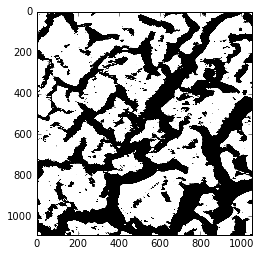

In [46]:
# filtere die Daten um den Musterverlauf besser
# darzustellen und visualisieren sie
filtered_data = np.where(data >= durchschnitt, 1, 0)

# zeige die gefilterten Daten als schwarz-weiß Bild an
plt.imshow(filtered_data, cmap=plt.get_cmap('Greys'))

<a name="uebung08"></a>Übung 08: Plots
===

1. **Plots**
  1. Erstelle ein Array x mit 100 Werten zwischen 0 und 2$\pi$
  2. Erstelle ein zweites Array mit Werten $\cos(x)$ und ein drittes Array mit Werten $\cos(2x)$.
  3. Plotte beide Kurven in einen Plot übereinander.  
  HINWEIS: wenn man einfach ```plot()``` zwei mal intereinander in der selben Zelle aufruft, dann werden die Kurven in das selbe Bild geplottet.
  4. Füge einen Titel und Achsenbeschriftungen hinzu.
  5. Gib beiden Kurven je ein Label und füge dem Plot eine Legende hinzu.
  6. **(Optional)** informiere dich über die Funktion ```plt.savefig()``` und verwende sie, um deinen Plot als .pdf Datei abzuspeichern.
  7. **(Optional)** Erstelle in 100 x 100 Array mit einem sinusförmigen Werteverlauf in x-Richtung. Plotte das Array mittels ```imshow()```.

<a name="referenzen"></a>Referenzen
===

* Ausführlicher und weiterführender Python Kurs auf Beginner-Level. Diente als Grundlage für diesen kurz-Workshop, auch basierend auf Jupyter-Notebooks: https://github.com/leriomaggio/python-in-a-notebook
* Tutorial zum einfachen Plotten mit ```matplotlib```: https://matplotlib.org/users/pyplot_tutorial.html
* Python in den Geowissenschaften - mehr zum Lesen als zum Üben, hat aber ein paar hilfreichen Links zu weiteren Tutorials: http://earthpy.org/category/introduction-to-python.html
* Spezielle Plot-Umgebung für Plots auf Karten. Gallerie: https://matplotlib.org/basemap/users/examples.html, Dokumentation: https://matplotlib.org/basemap/